In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt # simple export

In [3]:
def grad(x): # differentiation of f(x)=x^2 + 5sin(x)
    return 2*x+ 5*np.cos(x)

def cost(x) # the equation itself 
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0): # gradient descent function, eta is step and x0 is the starting point
    x = [x0] # setting vector
    for it in range(100): # starting steps, with maximum steps are 100
        x_new = x[-1] - eta*grad(x[-1]) # step function
        if abs(grad(x_new)) < 1e-3: # checking if f'(x) has fallen into an acceptable range of 1E-3
            break # break if done
        x.append(x_new) # probably saving x array step
    return (x, it)

In [4]:
(x1, it1) = myGD1(.1, -5) # logging result
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


In [5]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt # simple import
np.random.seed(2) 

(1000, 1)
(1000, 2)
(2, 2)
(2, 1)
(2, 1)
Solution found by formula: w =  [[3.99958926 3.00159306]]


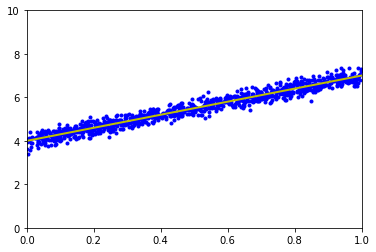

In [12]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
print(one.shape)
Xbar = np.concatenate((one, X), axis = 1)
print(Xbar.shape)
A = np.dot(Xbar.T, Xbar) # Linear regression
print(A.shape)
b = np.dot(Xbar.T, y)
print(b.shape)
w_lr = np.dot(np.linalg.pinv(A), b)
print(w_lr.shape)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [7]:
def grad(w): # gradient of linear regression loss function
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w): # the linear regression loss function
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

In [8]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [9]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.
